- Feature Scaling is a technique to standardize the independent features present in the data. It is performed during the data pre-processing to handle highly varying values.
- If feature scaling is not done then machine learning algorithm tends to use greater values as higher and consider smaller values as lower regardless of the unit of the values. For example it will take 10 m and 10 cm both as same regardless of their unit.

In [1]:
# Scaling can be done in 2 ways:
# 1. Standardization (z-score normalization)
# 2. Normalization (min-max scaling)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [6]:
df=df.iloc[:,2:]

In [7]:
df.sample(5)


Age  EstimatedSalary  Purchased
66    24            19000          0
175   23            28000          0
74    32            18000          0
152   31            76000          0
116   35            75000          0

## Train test split


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0

)

In [12]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [17]:
X_train

Age  EstimatedSalary
92    26            15000
223   60           102000
234   38           112000
232   40           107000
377   42            53000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[280 rows x 2 columns]

## Standard Scaler

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
scaler.mean_

array([3.71666667e+01, 6.95916667e+04])

In [20]:
X_train

Age  EstimatedSalary
92    26            15000
223   60           102000
234   38           112000
232   40           107000
377   42            53000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[280 rows x 2 columns]

In [21]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [22]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [23]:
X_train_scaled

Age  EstimatedSalary
0   -1.163172        -1.584970
1    2.170181         0.930987
2    0.013305         1.220177
3    0.209385         1.075582
4    0.405465        -0.486047
..        ...              ...
275  0.993704        -1.151185
276 -0.869053        -0.775237
277 -0.182774        -0.514966
278 -1.065133        -0.457127
279 -1.163172         1.393691

[280 rows x 2 columns]

In [24]:
X_test_scaled

Age  EstimatedSalary
0   -0.648073         0.530803
1    0.075357        -0.597376
2   -0.195929         0.164907
3   -0.648073         0.286873
4   -0.195929        -0.597376
..        ...              ...
115  1.070073        -0.140006
116  0.708358         1.872421
117 -0.557644         0.591786
118  0.798787         0.378347
119  0.889216        -0.566885

[120 rows x 2 columns]

In [25]:
np.round(X_train.describe(), 1)

Age  EstimatedSalary
count  280.0            280.0
mean    37.9          69807.1
std     10.2          34641.2
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0

In [26]:
np.round(X_train_scaled.describe(), 1)

Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.1              0.0
75%      0.8              0.5
max      2.2              2.3

## Effect Of Scaling

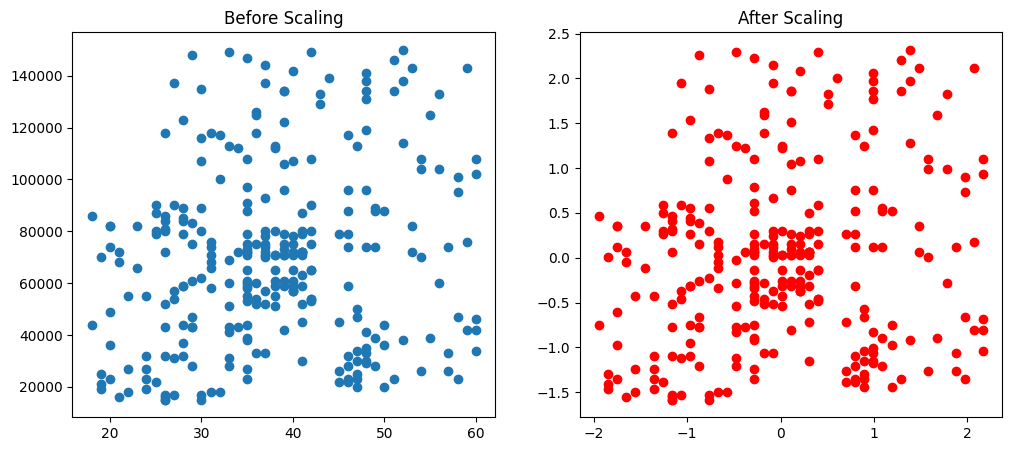

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
plt.show()

In [28]:
# No changes in the distribution